<a href="https://colab.research.google.com/github/Pavel-Zinkevich/Employee_salary/blob/main/Employee_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries and data import

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
od.download("https://www.kaggle.com/datasets/gmudit/employer-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pavelzinkevich
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/gmudit/employer-data


100%|██████████| 163k/163k [00:00<00:00, 414MB/s]

In [ ]:
df = pd.read_csv("employer-data/Employers_data.csv")

📊 Employee Salary Dataset
This synthetic dataset has been created for educational purposes and is ideal for exploring regression modeling. It includes realistic employee information with consistent relationships between features such as education level, job title, experience, and salary.

🧾 Dataset Summary
Property	Description
Rows	10,000
Target Variable	Salary (or another column as needed)
Use Case	Regression, EDA, feature engineering, model evaluation, fairness analysis

📌 Features

| Column            | Type        | Description                                                                 |
|-------------------|-------------|-----------------------------------------------------------------------------|
| `Employee_ID`     | Integer     | Unique identifier for each employee                                         |
| `Name`            | String      | Full name (gender-aware generation)                                         |
| `Gender`          | Categorical | Male or Female                                                              |
| `Age`             | Integer     | Age of the employee (based on education level and job title)                |
| `Education_Level` | Categorical | One of: High School, Bachelor, Master, PhD                                  |
| `Experience_Years`| Integer     | Number of years of professional experience                                  |
| `Department`      | Categorical | Business unit (e.g., HR, Engineering, Marketing, etc.)                      |
| `Job_Title`       | Categorical | Role of the employee (e.g., Analyst, Engineer, Manager, etc.)              |
| `Location`        | Categorical | Work location (e.g., New York, San Francisco, etc.)                         |
| `Salary`          | Integer     | Annual salary in USD — target variable for regression     

✅ Characteristics
- ✅ No missing values — all entries are complete  
- 📈 Realistic correlations, such as:
  - 🎓 Higher education → 💼 Higher job levels → 💰 Higher salaries  
  - 🧑‍🎓 Interns are younger and earn less  
  - 🧠 PhDs tend to be older and hold senior roles  
  - 🌍 Salary varies across departments and locations

🎯 Applications
- This dataset is well-suited for:

- 🔢 Regression modeling (Linear, XGBoost, Random Forest, etc.)

- 🛠️ Feature engineering and selection

- 🧠 Categorical variable encoding (one-hot, label encoding, etc.)

- 🔍 Hyperparameter tuning

- ⚖️ Bias & fairness analysis (e.g., gender pay gap)

- 📊 Exploratory Data Analysis (EDA) and visualization



In [ ]:
df.head()

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,2,John Mayes,56,Male,Sales,Executive,33,Master,Seattle,195000
2,3,Carlos Wille,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,4,Michael Bryant,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,5,Paula Douglas,25,Female,HR,Analyst,2,Master,Seattle,70000


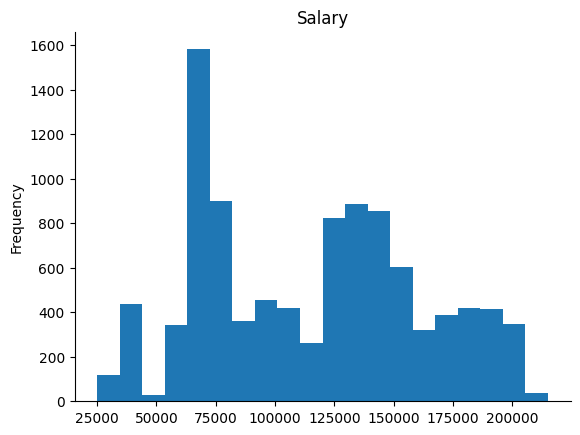

In [ ]:
# @title Salary

from matplotlib import pyplot as plt
df['Salary'].plot(kind='hist', bins=20, title='Salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df["Location"].value_counts()

,count
Location,
Austin,2034
Seattle,2017
Chicago,2008
New York,1980
San Francisco,1961


#Data manipulation and data visualisation

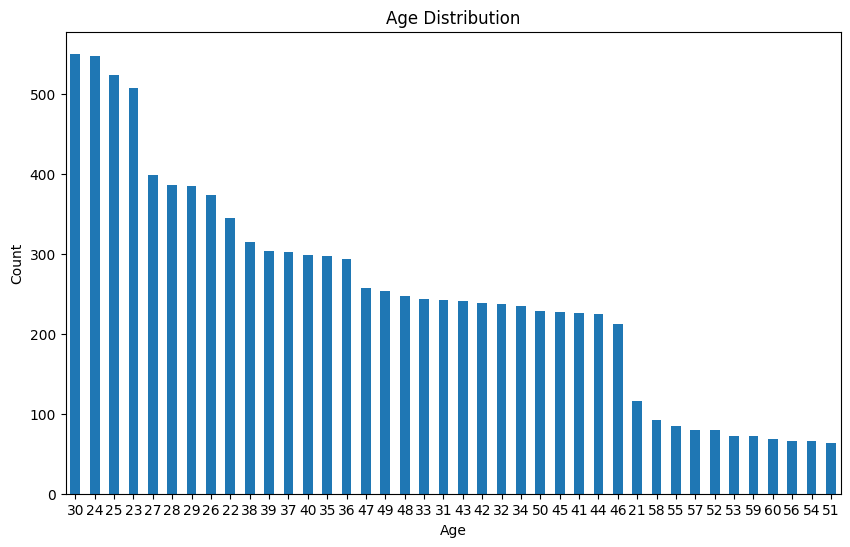

In [ ]:
age_counts = df['Age'].value_counts()

# Create the plot
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

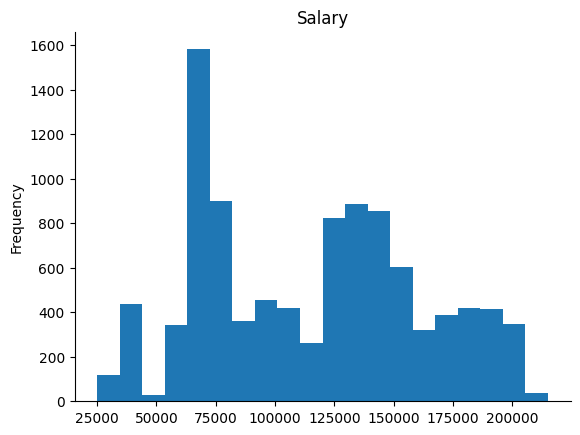

In [ ]:
# @title Salary

from matplotlib import pyplot as plt
df['Salary'].plot(kind='hist', bins=20, title='Salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

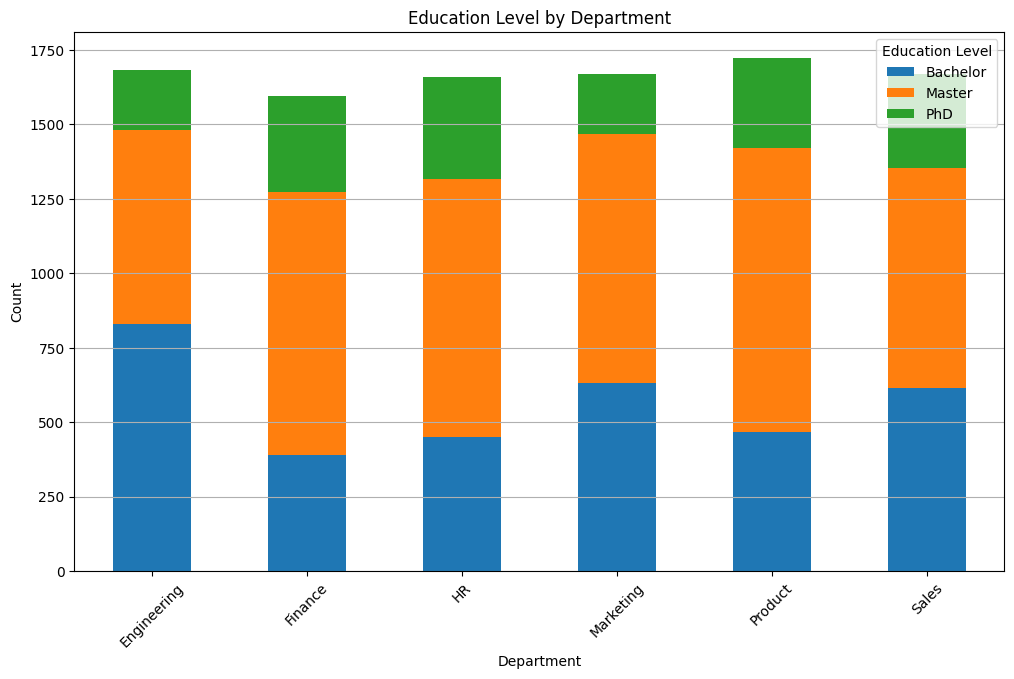

In [ ]:
# Grouping by Department and Education_Level
education_counts = df.groupby('Department')['Education_Level'].value_counts().unstack()

# Create the plot
education_counts.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Education Level by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Education Level')
plt.grid(axis='y')
plt.show()

In [ ]:
df["Gender_encoded"]=(df['Gender']=="Male").astype(int)

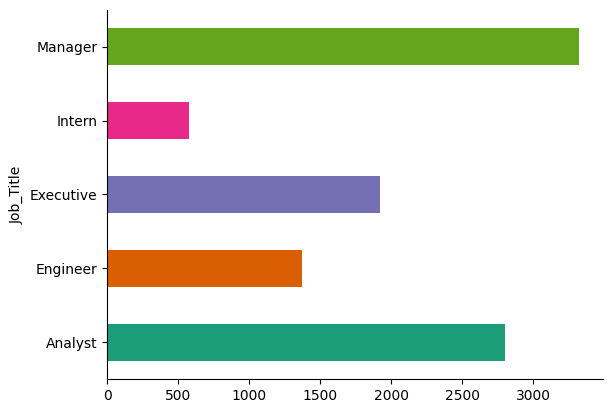

In [ ]:
# @title Job_Title

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Job_Title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_dummies = pd.get_dummies(df.drop(columns = ["Name", "Employee_ID", "Gender"]), drop_first=True)
# Assuming df_dummies is already defined

# Separate features and target variable
# x = df_dummies.drop(columns=['Salary'])  # Features
# y = df_dummies['Salary']

In [ ]:
df_dummies.head()

,Age,Experience_Years,Salary,Gender_encoded,Department_Finance,Department_HR,Department_Marketing,Department_Product,Department_Sales,Job_Title_Engineer,Job_Title_Executive,Job_Title_Intern,Job_Title_Manager,Education_Level_Master,Education_Level_PhD,Location_Chicago,Location_New York,Location_San Francisco,Location_Seattle
0,24,1,90000,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
1,56,33,195000,1,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True
2,21,1,35000,1,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
3,30,9,75000,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,25,2,70000,0,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True


#Model construction

In [ ]:
def model_fit(df, model):
    x = df.drop(columns=['Salary'])  # Features
    y = df['Salary']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('MSE:', mse)
    print('R2:', r2)
    residuals = y_test - y_pred
    plt.figure(figsize=(7, 4))
    sns.histplot(residuals, bins=40, kde=True)
    plt.axvline(0, color='red', linestyle='--')
    plt.title('Distribution of Residuals')
    plt.xlabel('Error (Actual - Predicted)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    return y_pred, mse, r2, model

#Fit and prediction

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.05, 0.1],
# }

# grid = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror'), param_grid, scoring='neg_mean_absolute_error')
# grid.fit(X_train, y_train)

# print("Best params:", grid.best_params_)
# best_params = grid.best_params_

# Best params: {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 1}

Best params: {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 1}


MSE: 17974718.0
R2: 0.9914717078208923


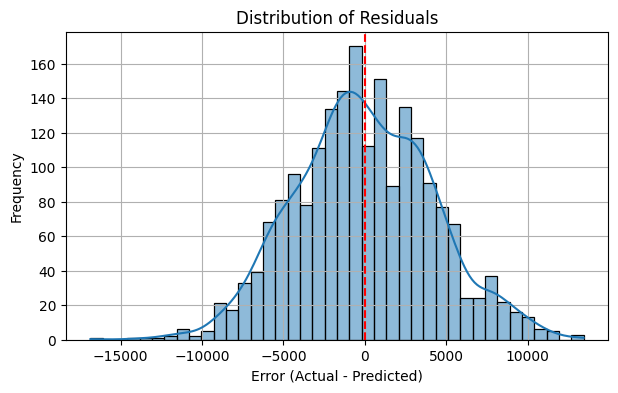

CPU times: user 926 ms, sys: 15.4 ms, total: 941 ms
Wall time: 663 ms


(array([138305.92 ,  76653.875,  67507.81 , ...,  95446.29 , 189544.19 ,
         63747.38 ], dtype=float32),
 17974718.0,
 0.9914717078208923,
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.04, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=20, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...))

In [ ]:
%%time
best_params = {
    'learning_rate': 0.04,
    'max_depth': 3,
    'min_child_weight': 20,
    'n_estimators': 500,
}
model_fit(df_dummies, xgb.XGBRegressor(objective='reg:squarederror', **best_params))

In [ ]:
df_dummies.head()

,Age,Experience_Years,Salary,Gender_encoded,Department_Finance,Department_HR,Department_Marketing,Department_Product,Department_Sales,Job_Title_Engineer,Job_Title_Executive,Job_Title_Intern,Job_Title_Manager,Education_Level_Master,Education_Level_PhD,Location_Chicago,Location_New York,Location_San Francisco,Location_Seattle
0,24,1,90000,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
1,56,33,195000,1,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True
2,21,1,35000,1,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
3,30,9,75000,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,25,2,70000,0,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True


MSE: 17375021.621597122
R2: 0.9917562580370475


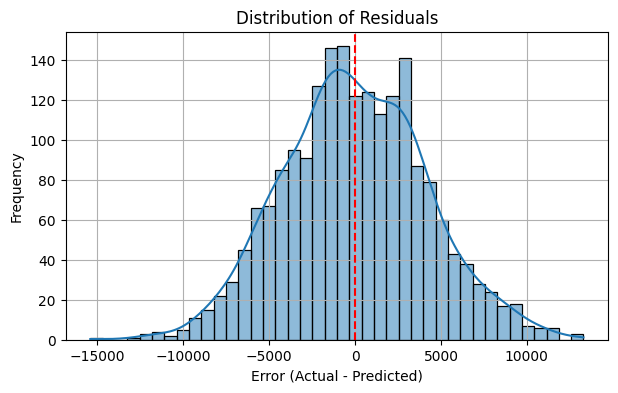

CPU times: user 366 ms, sys: 1.95 ms, total: 368 ms
Wall time: 215 ms


In [ ]:
%%time
_, _,_,model_trained = model_fit(df_dummies, LinearRegression())

#New Data Entery

In [ ]:
# После создания df_dummies (на этапе обучения):
X_columns = df_dummies.drop(columns=['Salary']).columns.tolist()


In [ ]:
def prepare_single_example(data_dict, X_columns):
    new_df = pd.DataFrame(data_dict)

    # Кодирование Gender
    new_df['Gender_encoded'] = (new_df['Gender'] == 'Male').astype(int)

    # Удаляем лишние колонки
    new_df = new_df.drop(columns=['Name', 'Employee_ID', 'Gender'])

    # Объединяем с фиктивной строкой из X_columns (чтобы получить нужные столбцы после get_dummies)
    dummy_base = pd.DataFrame(columns=X_columns)
    combined = pd.concat([dummy_base, new_df], ignore_index=True)

    # One-hot кодирование
    combined_dummies = pd.get_dummies(combined, drop_first=True)

    # Добавляем недостающие колонки, удаляем лишние
    for col in X_columns:
        if col not in combined_dummies.columns:
            combined_dummies[col] = 0
    combined_dummies = combined_dummies[X_columns]  # Упорядочим и обрежем лишнее

    return combined_dummies.iloc[[0]]  # возвращаем только наш пример


In [ ]:
X_columns

['Age',
 'Experience_Years',
 'Gender_encoded',
 'Department_Finance',
 'Department_HR',
 'Department_Marketing',
 'Department_Product',
 'Department_Sales',
 'Job_Title_Engineer',
 'Job_Title_Executive',
 'Job_Title_Intern',
 'Job_Title_Manager',
 'Education_Level_Master',
 'Education_Level_PhD',
 'Location_Chicago',
 'Location_New York',
 'Location_San Francisco',
 'Location_Seattle']

In [ ]:
# Подготовка новых данных
data = {
    'Employee_ID': [1],
    'Name': ['John Doe'],
    'Age': [24],
    'Gender': ['Female'],
    'Department': ['Product'],
    'Job_Title': ['Product Manager'],
    'Experience_Years': [1],
    'Education_Level': ['Bachelor'],
    'Location': ['Austin'],
    'Salary': [None]
}

# Подготовка признаков
new_data_transformed = prepare_single_example(data, X_columns)

# Прогноз
predicted_salary = model_trained.predict(new_data_transformed)
print(f"Предсказанная зарплата: {predicted_salary[0]:,.2f}")


Предсказанная зарплата: 58,003.21
